Gathering data from both C02 Emissions and Temperature change from several other csv sets from Kaggle.  See PowerPoint for links to those Kaggle references.

   Year  Emissions
0  1750       0.03
1  1760       0.03
2  1770       0.03
3  1780       0.03
4  1790       0.04


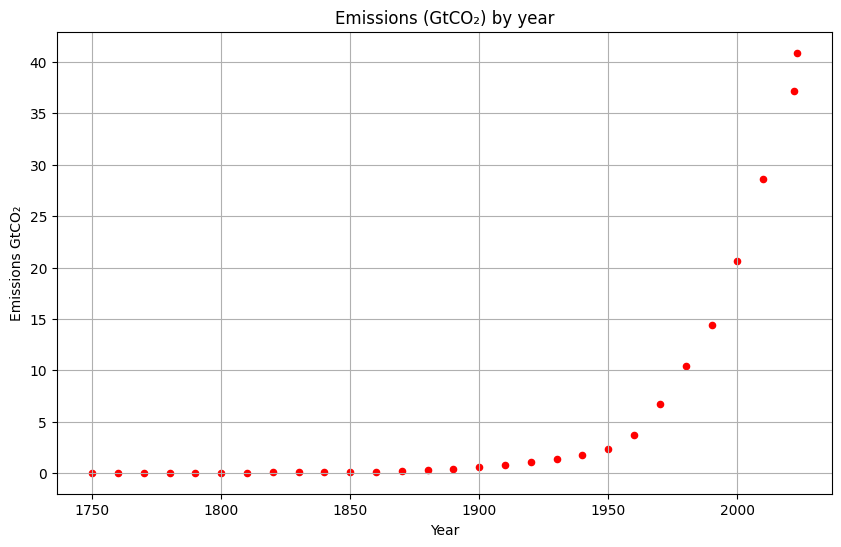

In [2]:
#add necessary files for graphics and data analysis
import pandas as pd
import matplotlib.pyplot as plt

#read GlobalC02Emisisons - this is only year and emissions
df_globalC02 = pd.read_csv("dataC02andTemp/GlobalCO2Emissions.csv")
print(df_globalC02.head())
df_globalC02.plot(x='Year', 
                  y='Emissions', 
                  kind='scatter',
                  title='Emissions (GtCO₂) by year',
                  xlabel = 'Year',
                  ylabel = 'Emissions GtCO₂',
                  color= 'red',
                  figsize=(10,6))
plt.grid(True)
plt.show()

2023: 40.9 gigatons of carbon dioxide is equivalent to 40,900,000,000 metric tons.  According to the above graph C02 emissions skyrocketed after 1950 globally and continues exponentially until 2023.

In [3]:
# with the above csv file we are now in need for more columns to better understand C02 
# emissions with a different data set which includes countries
df_C02 = pd.read_csv('dataC02andTemp/CO2_emission.csv')
#removing rows with null values
df_C02.dropna(axis=0, inplace=True)
print(df_C02.columns)

Index(['Country Name', 'country_code', 'Region', 'Indicator Name', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2019.1'],
      dtype='object')


In [4]:
#createa heatmap that includes the world of the latest information which would be 2019 with this csv file
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# load the low resolution world map
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world_columns = world.columns.tolist()
filtered_df = world['NAME']
print(filtered_df)
with open('NameColumn.txt', 'w') as f:
    for column in world_columns:
        f.write(column+ '\n')


0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object


In [5]:
#extracting zip file so I can get the shp file to work with.
import requests
import zipfile
import os
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "ne_110m_admin_0_countries.zip"

# Download the ZIP file
response = requests.get(url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("ne_110m_admin_0_countries")

# List the extracted files
extracted_files = os.listdir("ne_110m_admin_0_countries")

# Load the shapefile
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
gdf_countries = gpd.read_file(shapefile_path)

# Extract the list of countries
country_list = gdf_countries['ADMIN'].unique()  # Get unique country names

# Convert to a list (optional)
country_list = country_list.tolist()

# Put the country list in a file to compare to C02_emissions for merging
with open('CountryNames.txt', 'w') as f:
    for country in country_list:
        f.write(country + '\n')

In [6]:
#compare world country map with the countries in C02Emissions data
c02_emissions_Countries = df_C02['Country Name']
#modify some descrepencies
country_mapping = {
    'United States': 'United States of America',
    'Congo, Dem. Rep.': 'Democratic Republic of Congo',
    'Congo, Rep.': 'Republic of Congo',
    'Republic of Serbia': 'Serbia',
    'Puerto Rico': 'Puerto Rico',
    'Eritrea': 'Eritrea',
    'Syrian Arab Republic': 'Syria',
    'Yemen, Rep.': 'Yemen',
    'Egypt, Arab Rep.': 'Egypt',
    'Korea, Rep.' : 'North Korea',
    "Korea, Dem. People's Rep.": 'South Korea',
    'Kuwait': 'Kuwait',
    'Eswatini': 'eSwatini',
    'Czechia' : 'Czech Republic',
    'Namibia': 'Namibia',
    'Russian Federation': 'Russia',
    'Iran, Islamic Rep.': 'Iran',
    'Turkiye': "Turkey",
    'Lao PDR': 'Laos',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Somalia': 'Somaliland',
    'Tanzania': 'United Republic of Tanzania',
    'Brunei Darussalam': 'Brunei',
    'Mali': 'Mali',
    'West Bank and Gaza': 'Palestine',
    'Gambia, The': "Gambia",
    'Greenland': 'Greenland',
    'New Caledonia': 'New Caledonia',
    'Bahamas, The': 'The Bahamas',
    "Venezuela, RB": 'Venezuela',
    "Cote d'Ivoire": 'Ivory Coast',
    'Slovak Republic': 'Slovakia'
}

print(list(set(country_list) - set(c02_emissions_Countries)))


['Taiwan', 'East Timor', 'Falkland Islands', 'Mali', 'New Caledonia', 'Somaliland', 'Palestine', 'Republic of Serbia', 'Turkey', 'Ivory Coast', 'Republic of the Congo', 'The Bahamas', 'Greenland', 'Czechia', 'Laos', 'South Korea', 'Iran', 'Gambia', 'Puerto Rico', 'Namibia', 'North Korea', 'Yemen', 'Northern Cyprus', 'Brunei', 'Kyrgyzstan', 'Antarctica', 'Egypt', 'Russia', 'Slovakia', 'Venezuela', 'Syria', 'Democratic Republic of the Congo', 'Eritrea', 'Kuwait', 'eSwatini', 'United States of America', 'Western Sahara', 'Kosovo', 'French Southern and Antarctic Lands', 'United Republic of Tanzania']


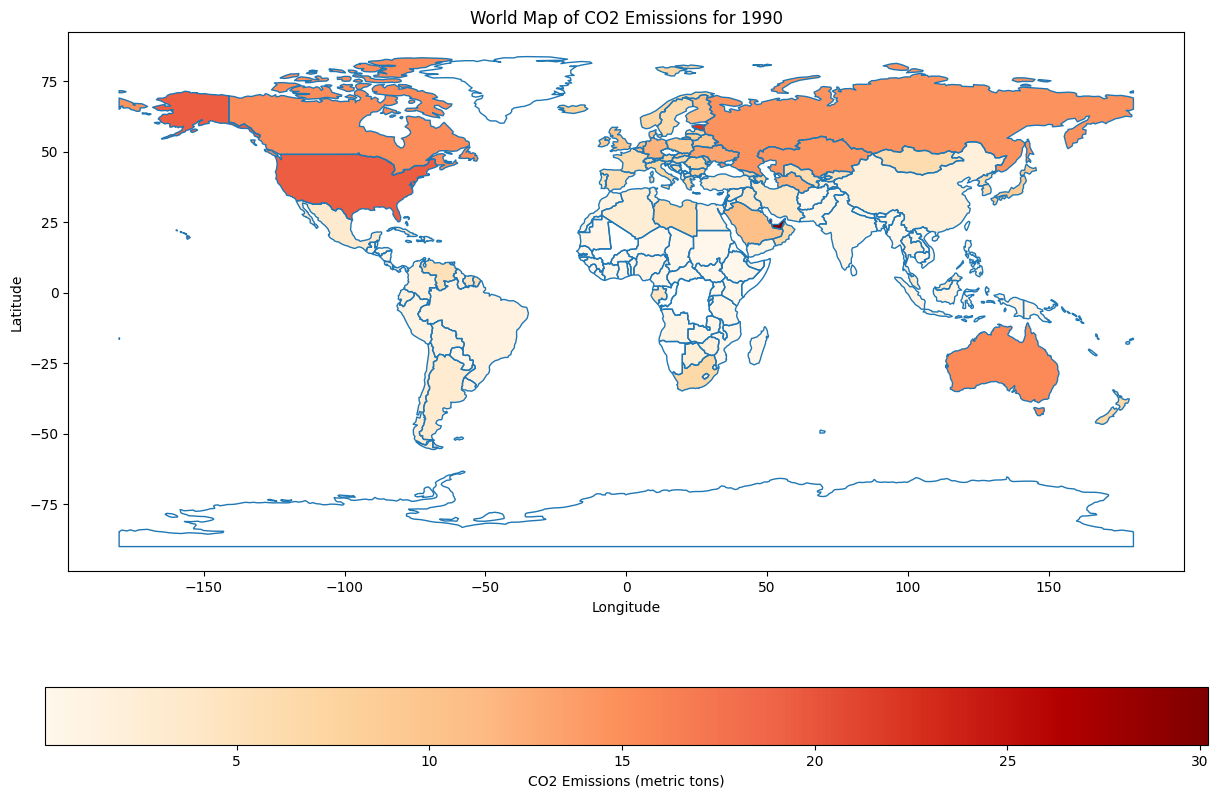

In [7]:
# Some country names - like United States is listed as United States of America in gdf
df_C02['Country Name'] = df_C02['Country Name'].replace(country_mapping)

# merge to find matches
gdf_merged = gdf_countries.merge(df_C02, 
                                 how='left', 
                                 left_on='ADMIN', 
                                 right_on='Country Name')

fig, ax = plt.subplots(1,1, figsize=(15, 10))
#plot country boundaries
gdf_merged.boundary.plot(ax=ax, linewidth=1)
gdf_merged.plot(column='1990', 
                ax=ax, 
                legend=True,
                legend_kwds={'label': "CO2 Emissions (metric tons)",
                             'orientation': "horizontal"},
                cmap='OrRd')
# Add title and labels
plt.title('World Map of CO2 Emissions for 1990')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

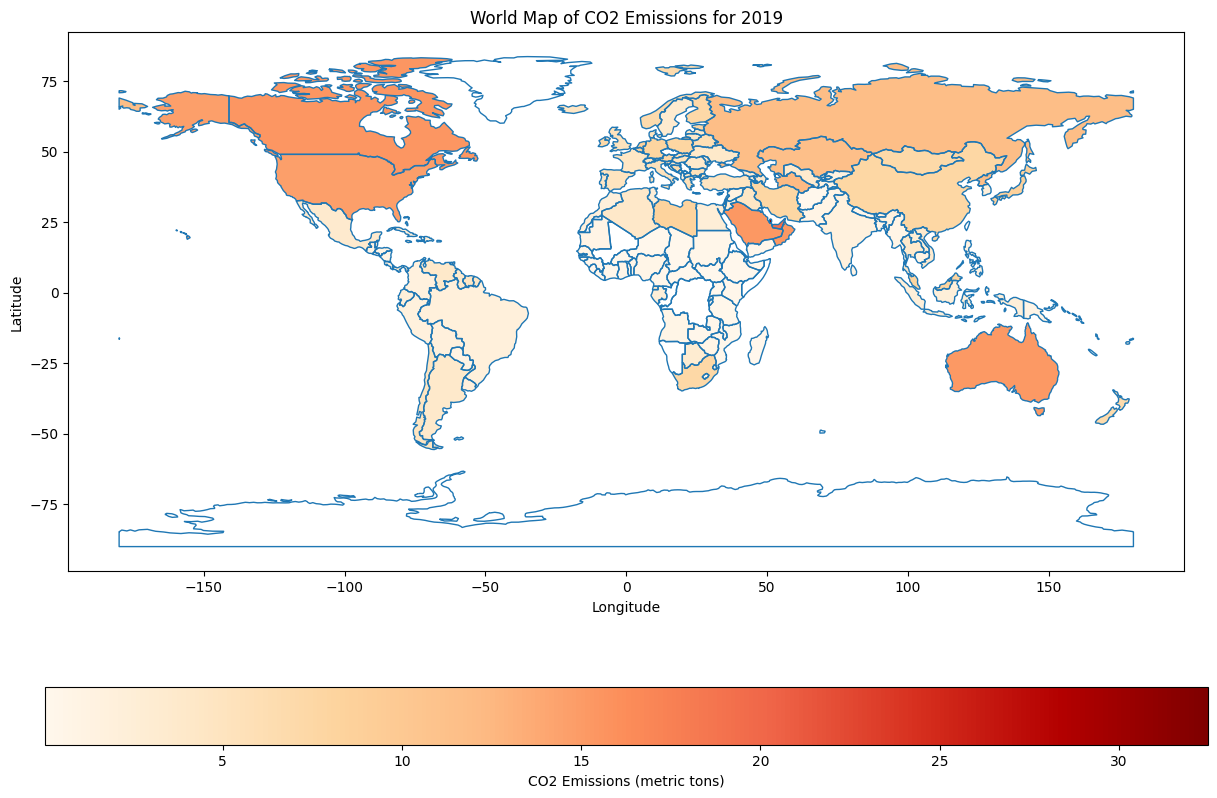

In [8]:
# merge to find matches
gdf_merged = gdf_countries.merge(df_C02, 
                                 how='left', 
                                 left_on='ADMIN', 
                                 right_on='Country Name')

fig, ax = plt.subplots(1,1, figsize=(15, 10))
#plot country boundaries
gdf_merged.boundary.plot(ax=ax, linewidth=1)
gdf_merged.plot(column='2019', 
                ax=ax, 
                legend=True,
                legend_kwds={'label': "CO2 Emissions (metric tons)",
                             'orientation': "horizontal"},
                cmap='OrRd')
# Add title and labels
plt.title('World Map of CO2 Emissions for 2019')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

So the above two maps show the difference between 1990 and 2019.  It looks like some regions have been pretty bad(like the US and Canada) in 1990.  However, by 2019 there has been improvements with the level of C02 emissions.  In other regions of the world like China, and parts of Africa have worsened.  In South America, it looks the same.  Austrialia has gotten slightly better.

In [55]:
#now let's read the temperature changes by country
df_temperature = pd.read_csv('dataset/GlobalLandTemperaturesByCountry.csv')
print(df_temperature.head())
print(df_temperature.info())

#clean the data by dropping missing values
df_temperature = df_temperature.dropna()

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None


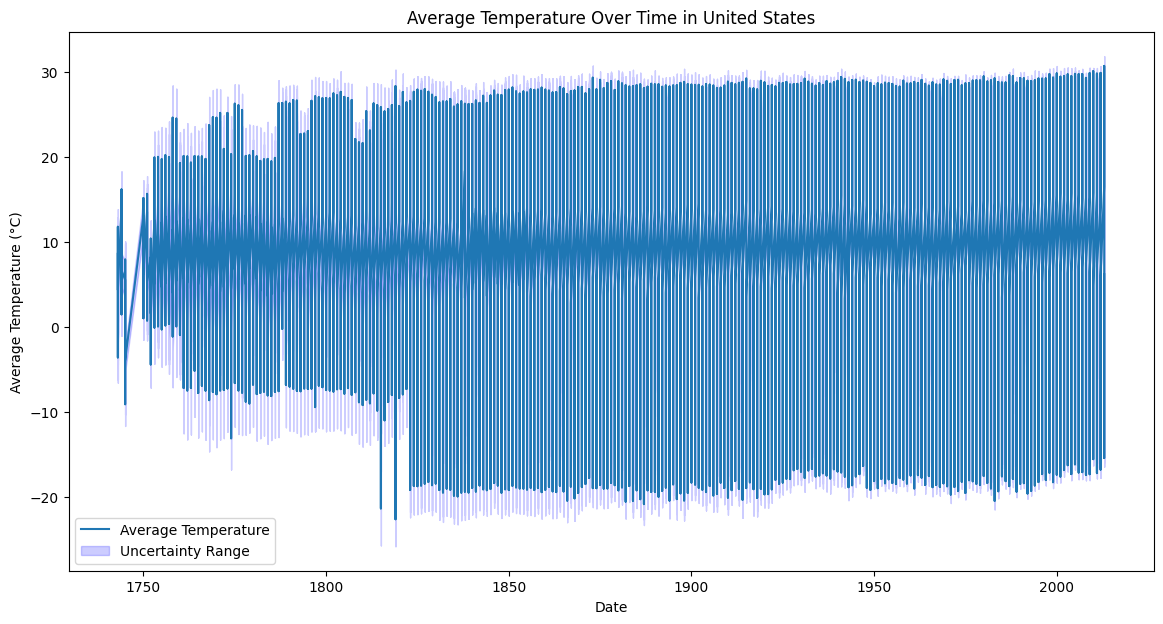

In [56]:
#now we plot the graph
import matplotlib.pyplot as plt

#convert 'dt' to datetime format
df_temperature['dt'] = pd.to_datetime(df_temperature['dt'], errors = 'coerce')
# Drop rows with NaT in 'dt' if any
df_temperature = df_temperature.dropna(subset=['dt'])

country = 'United States'
df_country = df_temperature[df_temperature['Country'] == country]

# Extract the year from the 'dt' column
df_temperature['Year'] = df_temperature['dt'].dt.year
# Group by year and calculate the average temperature
df_yearly = df_temperature.groupby(['Year', 'Country'], as_index=False).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
})
plt.figure(figsize=(14, 7))
plt.plot(df_yearly['Year'], 
         df_yearly['AverageTemperature'], 
         label='Average Temperature')
plt.fill_between(df_yearly['Year'], 
                 df_yearly['AverageTemperature'] - df_yearly['AverageTemperatureUncertainty'], 
                 df_yearly['AverageTemperature'] + df_yearly['AverageTemperatureUncertainty'], 
                 color='b', alpha=0.2, label='Uncertainty Range')
plt.title(f'Average Temperature Over Time in {country}')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

Notice the level of uncertianinty decreases dramatically by the 1900s as recording gets better.  This particular graph shows that the average range of temperatures have been increasing higher even at the colder end.

<Figure size 1200x600 with 0 Axes>

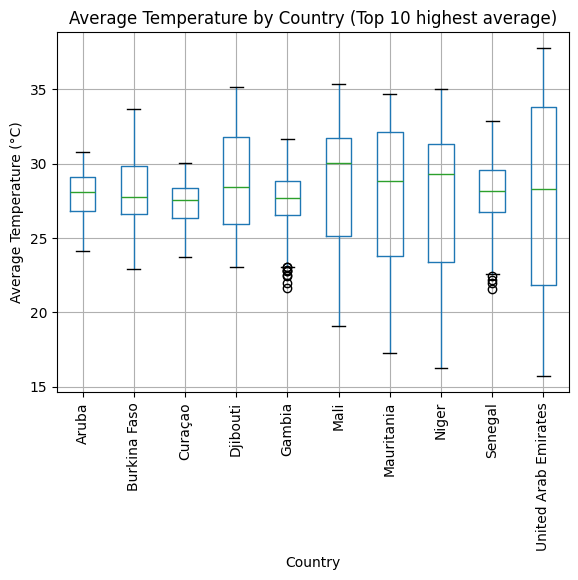

In [64]:
# Calculate the average temperature for each country
average_temp = df_temperature.groupby('Country')['AverageTemperature'].mean().reset_index()

# Get the top 10 countries by average temperature
top_countries = average_temp.nlargest(10, 'AverageTemperature')['Country']

# Filter the original DataFrame to include only the top countries
df_top_countries = df_temperature[df_temperature['Country'].isin(top_countries)]

# Create the boxplot
plt.figure(figsize=(12, 6))
df_top_countries.boxplot(column='AverageTemperature', by='Country', rot=90)
plt.title('Average Temperature by Country (Top 10 highest average)')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.show()

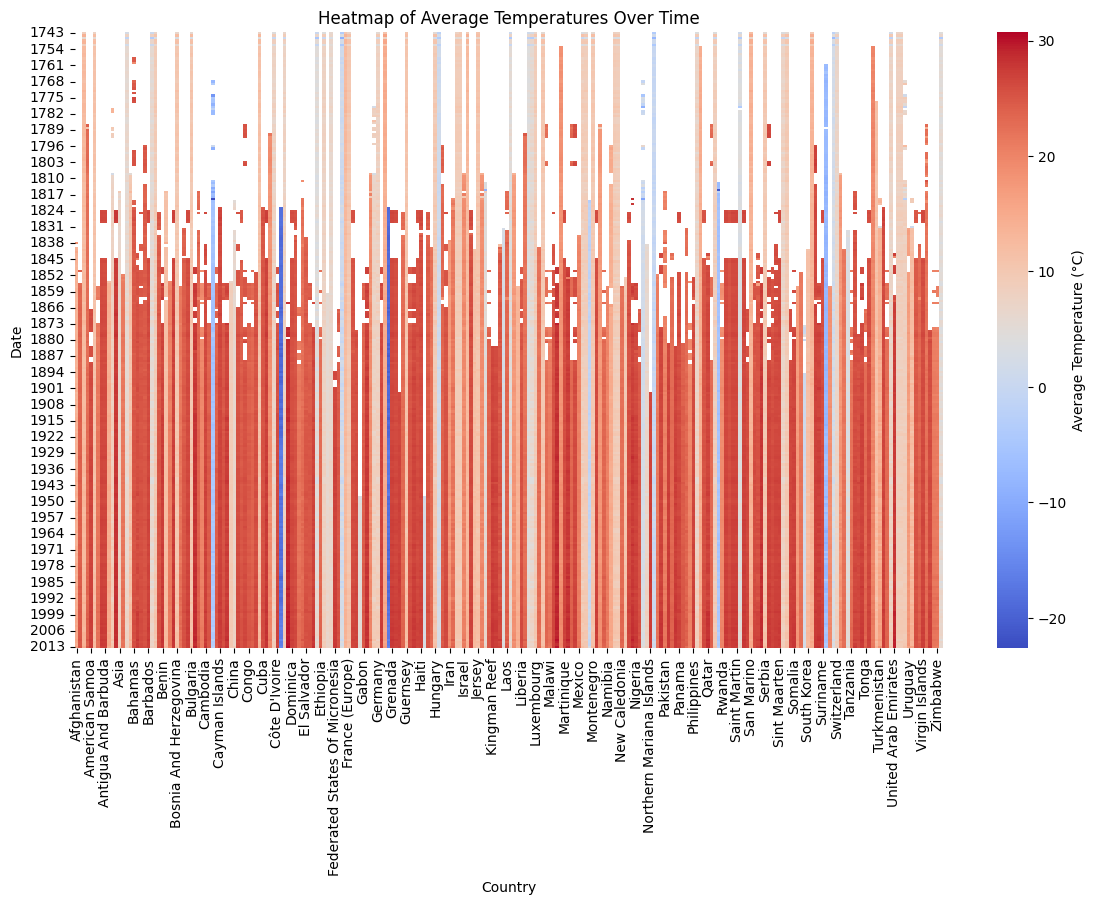

In [58]:
import seaborn as sns

# Pivot the DataFrame for heatmap
heatmap_data = df_temperature.pivot_table(values='AverageTemperature', 
                                           index='Year', 
                                           columns='Country')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Heatmap of Average Temperatures Over Time')
plt.xlabel('Country')
plt.ylabel('Date')
plt.show()

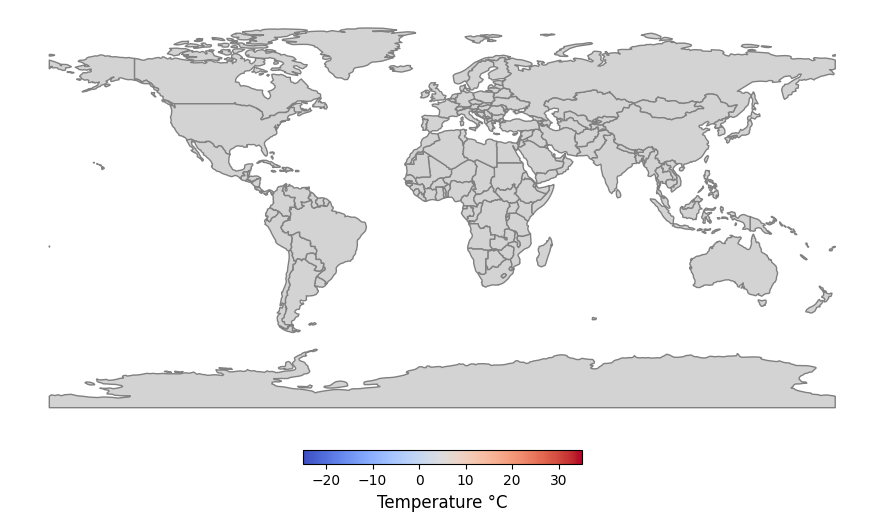

In [151]:
import matplotlib.animation as animation # adding animation.
from matplotlib.colors import Normalize # normalizing colors
from matplotlib.cm import ScalarMappable # color maps
from matplotlib.animation import FuncAnimation

#Get the list of country names to a list
TempsByCountryList = df_temperature['Country'].to_list()
with open('CountryNameAndTemp.txt', 'w') as f:
    for country in TempsByCountryList:
        f.write(country + '\n')
#get the country code from natural earth
filtered_NE = world['ADMIN']
with open('NEcountry.txt', 'w') as f:
    for line in filtered_NE:
        f.write(line +'\n')
    
#The country name doesn't port over well.
#print(list(set(country_list) - set(TempsByCountryList)))
mapping_country = {
      'United States of America': 'United States of America',
      'Timor Leste': 'East Timor',
      'Guinea Bissau': 'Guinea-Bissau',
      'Falkland Islands (Islas Malvinas)': 'Falkland Islands',
      'Palestina': 'Palenstine',
      'Serbia': 'Republic of Serbia',
      'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
      "Côte D'Ivoire": 'Ivory Coast',
      'Congo (Democratic Republic Of The)': 'Republic of the Congo',
      'Bahamas': 'The Bahamas',
      'Sudan': 'South Sudan',
      'Czech Republic': 'Czechia'
}

df_temperature['Country'] = df_temperature['Country'].replace(mapping_country)
# Group by year and calculate the average temperature
df_yearly = df_temperature.groupby(['Year', 'Country'], as_index=False).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
})
# for the animation call to get the initial static map
def init():
    world.plot(ax=ax, color='lightgrey', edgecolor='grey') # Empty Canvas
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.axis('off')
    ax.set_title('', fontsize=20, pad=10)
    return ax,

# this is what will make the map animate.
def animate(year):
    #optimize the animation's performance.
    ax.clear()
    # get the current date
    current_data = df_temperature[df_temperature['Year'] == year]
    #Merge the temperature data with the world dataframe
    map_for_date = world.merge(current_data,
                            how='left',
                            left_on='ADMIN',
                            right_on='Country')
    map_for_date.plot(column=df_temperature['AverageTemperature'], 
                  cmap='coolwarm',
                  linewidth=0.1,
                  ax=ax,
                  edgecolor='grey',
                  legend=True,
                  vmin=-25,
                  vmax=35,
                  missing_kwds={'color': 'lightgrey', 'hatch': '///'})
    #Labels
    ax.set_title(f'Tracking Global Temperature by Date', fontsize=20, pad=30, weight='bold')
    ax.axhline(y=0.5, color='black', linestyle='--', alpha=0.2) #horizontal line
    date_pd = pd.to_datetime(str(date))
    date_formatted = date_pd.strftime('%Y')

    # get the average format of the average temperature
    avg = df_temperature['AverageTemperature']
    avg_formatted = "{:.1f}".format(avg)
    
    ax.annotate(date_formatted, xy=(0.5, 0), xytext=(0,0),
                xycoords='axes fraction', textcoords='offset points', 
                ha='center', fontsize=14, color='grey', weight='bold')
    ax.annotate('Countries more distant from the equator experience greater fluctuations in temperature',
                xy=(0.5,1.03), xytext=(0,0), xycoords='axes fraction', 
                textcoords='offset points',ha='center', fontsize=24, color='grey', weight='normal')
    ax.annotate('Yearly Average °C',
                xy=(0.5, 0.98), xytext=(0,0), xycoords='axes fraction',
                textcoords='offset points', ha='center', fontsize=10, color='grey')
    ax.annotate(avg_formatted+'  °C', xy=(0.15, 0.1), xytext=(0,0),
                xycoords='axes fraction', textcoords='offset points', 
                ha='center', fontsize=24, color='grey', weight='normal')
    ax.annotate('Equilatorial Line', xy=(0.9, 0.43), xytext=(0,0),
                xycoords='axes fraction', textcoords='offset points', 
                ha='center', fontsize=7, color='black', weight='bold')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.axis('off')
    return ax,
    
# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(12, 6))

#Normalize values between vmin and vmax.
norm = Normalize(vmin=-25, vmax=35)

#Create the color bar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='coolwarm'),
                    ax=ax, orientation='horizontal', pad=0.05,
                    fraction = 0.046, aspect=20, shrink=0.3)

#adding label
cbar.set_label('Temperature °C', fontsize=12)

#Create a list with unique years
years = df_temperature['dt'].unique()

ani = animation.FuncAnimation(fig, animate, frames=years, init_func=init, blit=False)